**Background**

Membangun suatu system pengatur kecepatan untuk suatu kendaraan. Input dari system ini adalah temperature udara dan juga keadaan awan pada saat kejadian. Output dari system akan menyarankan kecepatan yang sesuai dengan input.

**Linguistik**

-	Cuaca: {SANGAT DINGIN, DINGIN, HANGAT, PANAS}
-	Awan: {CERAH, BERAWAN, MENDUNG}
-	Kecepatan: {PELAN, CEPAT}

**Numerik**

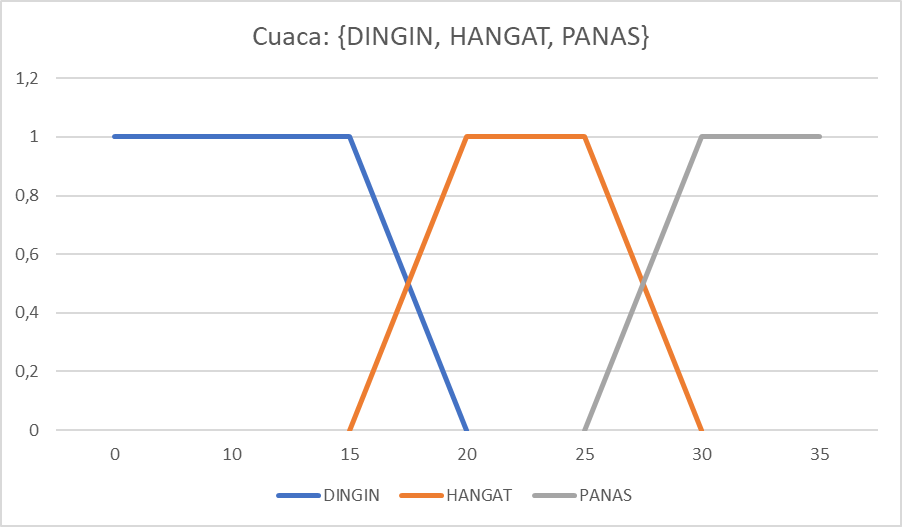

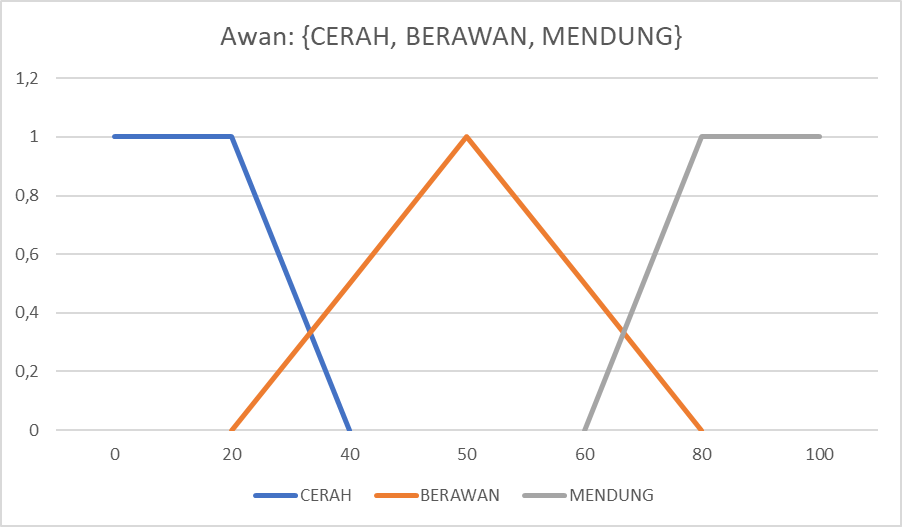

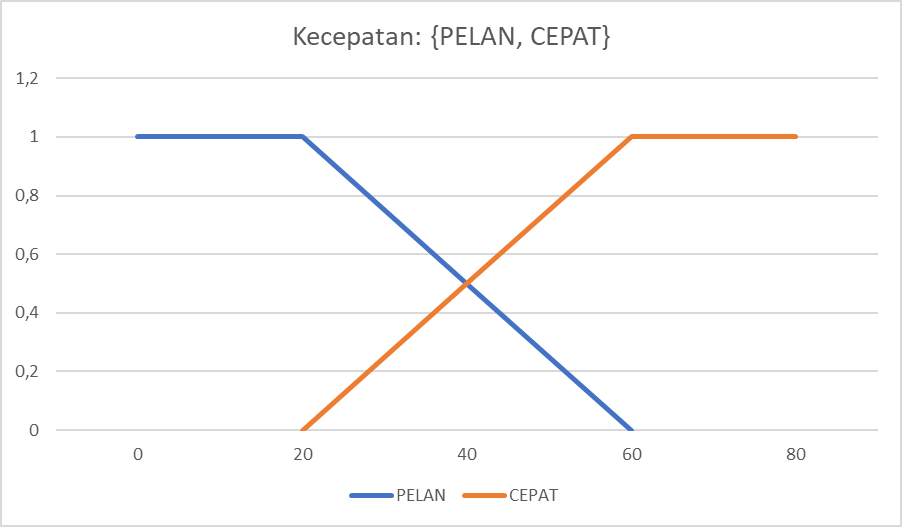

**Rule**

1.	Jika awan CERAH dan cuaca DINGIN, maka kecepatan CEPAT
2.	Jika awan CERAH dan cuaca PANAS, maka kecepatan CEPAT
3.	Jika awan BERAWAN dan cuaca HANGAT, maka kecepatan PELAN
4.	Jika awan BERAWAN dan cuaca DINGIN, maka kecepatan PELAN

**Kode Program**

Membuat fungsi untuk mencari nilai keanggotan fuzzy dari input.

>Variabel Fuzzy Cuaca

In [1]:
def fuzCuaca(cuaca, temp):

  match cuaca:
    # DINGIN
    case 'dingin':
      if (temp <= 15):
        return 1
      elif (temp >= 20):
        return 0
      else:
        # Turun
        return (20 - temp)/(20 - 10)

    # HANGAT
    case 'hangat':
      if (temp <= 15 or temp >= 30):
        return 0
      elif (temp >= 20 and temp <= 25):
        return 1
      elif (temp < 20 and temp > 15):
        # Naik
        return (temp - 15)/(20 - 15)
      else:
        # Turun
        return (30 - temp)/(30 - 25)

    # PANAS
    case 'panas':
      if (temp <= 25):
        return 0
      elif (temp >= 30):
        return 1
      else:
        # Naik
        return (temp - 25)/(30 - 25)

>Variabel Fuzzy Awan

In [2]:
def fuzAwan(awan, persentase):

  match awan:
    # CERAH
    case 'cerah':
      if (persentase <= 20):
        return 1
      elif (persentase >= 40):
        return 0
      else:
        # Turun
        return (40 - persentase)/(40 - 20)

    # BERAWAN
    case 'berawan':
      if (persentase <= 20 or persentase >= 80):
        return 0
      elif (persentase < 50 and persentase > 20):
        # Naik
        return (persentase - 20)/(50 - 20)
      else:
        # Turun
        return (80 - persentase)/(80 - 50)

    # MENDUNG
    case 'mendung':
      if (persentase <= 60):
        return 0
      elif (persentase >= 80):
        return 1
      else:
        # Naik
        return (persentase - 60)/(80 - 60)

Membuat fungsi untuk mencari nilai fuzzy dari Kecepatan.

>Variabel Fuzzy Kecepatan

In [3]:
def alphaCepat(cuaca, awan):
  return min(cuaca, awan)

>Himpunan Kecepatan

In [4]:
def fuzCepat(cepat, alpha):

  match cepat:
    # PELAN
    case 'pelan':
      return (60 - (alpha * (60 - 20)))

    # CEPAT
    case 'cepat':
      return ((alpha * (60 - 20)) + 20)

Mnecari nilai z

In [5]:
def zValue(alpha1, z1, alpha2, z2, alpha3, z3, alpha4, z4):
  atas = ((alpha1 * z1) + (alpha2 * z2) + (alpha3 * z3) + (alpha4 * z4))
  bawah = alpha1 + alpha2 + alpha3 + alpha4

  return atas/bawah

**Problem Solving**

In [6]:
# Deklarasikan dan masukkan semua variabel-variabel fuzzy
cuaca = 27
awan = 35

In [7]:
# Menghitung nilai fuzzy
varFuzDingin = fuzCuaca('dingin', cuaca)
varFuzHangat = fuzCuaca('hangat', cuaca)
varFuzPanas = fuzCuaca('panas', cuaca)

varFuzCerah = fuzAwan('cerah', awan)
varFuzBerawan = fuzAwan('berawan', awan)
varFuzMendung = fuzAwan('mendung', awan)

In [17]:
# Rule 1
alpha1 = alphaCepat(varFuzDingin, varFuzCerah)
z1 = fuzCepat('cepat', alpha1)

print("Nilai alpha: {}; nilai z: {}".format(alpha1, z1))

Nilai alpha: 0; nilai z: 20


In [18]:
# Rule 2
alpha2 = alphaCepat(varFuzPanas, varFuzCerah)
z2 = fuzCepat('cepat', alpha2)

print("Nilai alpha: {}; nilai z: {}".format(alpha2, z2))

Nilai alpha: 0.25; nilai z: 30.0


In [19]:
# Rule 3
alpha3 = alphaCepat(varFuzHangat, varFuzBerawan)
z3 = fuzCepat('cepat', alpha3)

print("Nilai alpha: {}; nilai z: {}".format(alpha3, z3))

Nilai alpha: 0.5; nilai z: 40.0


In [20]:
# Rule 4
alpha4 = alphaCepat(varFuzDingin, varFuzBerawan)
z4 = fuzCepat('cepat', alpha4)

print("Nilai alpha: {}; nilai z: {}".format(alpha4, z4))

Nilai alpha: 0; nilai z: 20


In [21]:
zVal = zValue(alpha1, z1, alpha2, z2, alpha3, z3, alpha4, z4)
print("{} km/h".format(zVal))

36.666666666666664 km/h
